# SPAM FILTERING PROJECT

#### Importing the Libraries

In [1]:

import nltk # for importing natural language toolkit

#if trying for the first time, use nltk.download()


In [2]:
import pandas as pd                                    # importing pandas
import numpy as np                                     # importing numpy
import matplotlib.pyplot as plt                        # import matplotlib for plotting.
import seaborn as sns                                  # for beautifying the plots.

#### Reading the dataset to create a dataframe

In [3]:
messages=pd.read_csv('train.csv')
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Basic data summary and description

In [4]:
#Shape of the dataframe

messages.shape

(8551, 2)

In [5]:
#Sum of duplicated values in the dataframe

messages.duplicated().sum()

530

In [6]:
#Sum of all the NULL values present in dataframe

messages.isnull().sum()

label      10
message     3
dtype: int64

In [7]:
#Dropping the NA values

messages.dropna(inplace=True)
messages.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
#Saving the total length in a new column

messages['leng']=messages['message'].apply(lambda x:len(x) - x.count(" "))
messages.head()

,label,message,leng
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [9]:
#Name of columns

messages.columns

Index(['label', 'message', 'leng'], dtype='object')

#### Basic Data Visualization (Knowing the DATA!)

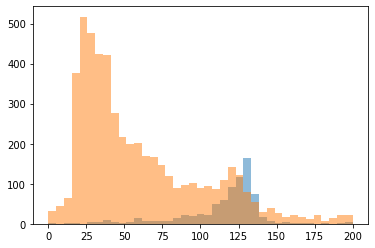

In [10]:
#Creating bins for grouping
bins=np.linspace(0,200,40)

#Plotting histogram
plt.hist(messages[messages['label']=='spam']['leng'],bins,alpha=0.5,label='spam')
plt.hist(messages[messages['label']=='ham']['leng'],bins,alpha=0.5,label='ham')
plt.show()

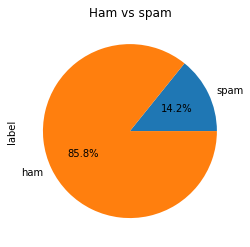

In [11]:
#Plotting Pie Chart

messages.label.value_counts(sort=False).plot.pie(autopct='%1.1f%%')
plt.title('Ham vs spam')
plt.show()

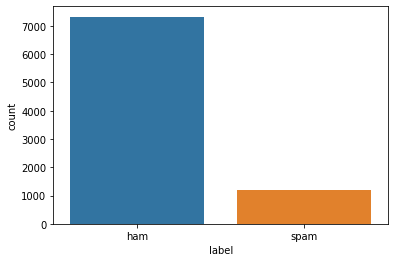

In [12]:
#Creating countplot

sns.countplot(x="label", data=messages);

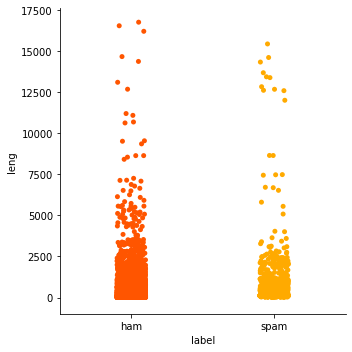

In [13]:
#Plotting the catplot

sns.catplot(x='label',y='leng',palette='autumn',data=messages)

#### Data Cleaning & Preprocessing

In [14]:
# Data Cleaning and PreProcessing
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8538 entries, 0 to 8547
Data columns (total 3 columns):
label      8538 non-null object
message    8538 non-null object
leng       8538 non-null int64
dtypes: int64(1), object(2)
memory usage: 586.8+ KB


In [16]:
#Total word count

text = " ".join(word for word in messages.message)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4084175 words in the combination of all review.


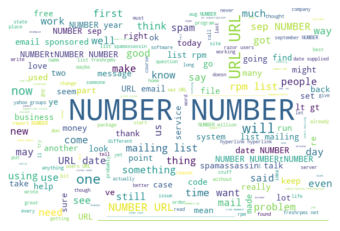

In [17]:
#Creating a wordcloud

from wordcloud import WordCloud
wordcloud = WordCloud( background_color="white",width=600,height=400).generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#converting into lower
messages['lowered']=messages['message'].str.lower()

In [19]:
#Initial word count

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['lowered']=messages['lowered'].apply(str)
X_vct_low = cv.fit_transform(messages['lowered'])
print(X_vct_low.shape)

(8538, 32570)


In [20]:
#Inidividual Word Count

pd.Series(' '.join(messages.lowered).split()).value_counts()

number             32661
the                25938
to                 18529
and                13188
a                  13187
                   ...  
yorker                 1
aunty                  1
wrk!                   1
franchisevilles        1
ha.                    1
Length: 38063, dtype: int64

##### Removing contracted words

In [21]:
#removing contrated words

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
#An example to show what it does

msg = messages['lowered'][0]
res = decontracted(msg)
res

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [23]:
messages['After_Con']=messages['lowered'].apply(lambda x:decontracted(x))
messages['After_Con'].head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i do not think he goes to usf, he lives ar...
5    freemsg hey there darling it is been 3 week is...
6    even my brother is not like to speak with me. ...
7    as per your request  amelle melle (oru minnami...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: After_Con, dtype: object

##### Replacing accented characters

In [24]:
#Replacing accented characters

import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [25]:
# An example

msg = messages['After_Con'][0]
res = strip_accents(msg)
res

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [26]:
messages['acc']=messages['After_Con'].apply(lambda x:strip_accents(x))
messages['acc'].head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i do not think he goes to usf, he lives ar...
5    freemsg hey there darling it is been 3 week is...
6    even my brother is not like to speak with me. ...
7    as per your request  amelle melle (oru minnami...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: acc, dtype: object

In [27]:
#Counting words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['acc']=messages['acc'].apply(str)
X_vct_acc = cv.fit_transform(messages['acc'])
print(X_vct_acc.shape)

(8538, 32117)


##### Filtering the string for unwanted things

In [28]:
#Filtering the string to use unwanted characters

def filter_string(text):
    

    result = re.sub('(confidential \scommunication:[\s\S]*)', '', str(text))  # Removes Confidential Communication Para

    result = re.sub('(confidentiality\snotice:[\s\S]*)', '', str(result))  # Removes Confidentiality Notice Para

    result = re.sub(r'http\S+', '', str(result))                         # Removes Hyperlinks

    result = re.sub('[^A-Za-z]+', ' ', str(result))               # Removes Special Characters and selecting only alphabets
    
    result = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', str(result))
    
    

    return result

In [29]:
#example

msg = messages['acc'][0]
res = filter_string(msg)
res

'go until jurong point crazy available only in bugis great world la buffet cine there got amore wat '

In [30]:
messages['filter']=messages['acc'].apply(lambda x:filter_string(x))
messages['filter'].head(10)

0    go until jurong point crazy available only in ...
1                               ok lar joking wif oni 
2    free entry in wkly comp to win fa cup final tk...
3               dun say so early hor already then say 
4    nah do not think he goes to usf he lives aroun...
5    freemsg hey there darling it is been week is n...
6    even my brother is not like to speak with me t...
7    as per your request amelle melle oru minnaminu...
8    winner as valued network customer you have bee...
9    had your mobile months or more entitled to upd...
Name: filter, dtype: object

##### Removing punctuation

In [31]:
#Removing punctuations

def remove_punctuation(text):

    text = re.sub(r'(([\w]+)\@(\w+\.\w+)(\w+)?)',' ',str(text))      # Removes  email

    text = re.sub(r'[^\w\s]',' ',str(text))                          # Removes punctuation

    text = re.sub(r"\n|\r",' ', str(text))                           # Removes New Lines

    text = re.sub(r'[^a-zA-Z]',' ',str(text))                        # Remove Numeric Values

    return text

In [32]:
# example

msg = messages['filter'][0]
res = remove_punctuation(msg)
res

'go until jurong point crazy available only in bugis great world la buffet cine there got amore wat '

In [33]:
messages['punc']=messages['filter'].apply(lambda x:remove_punctuation(x))
messages['punc'].head(10)

0    go until jurong point crazy available only in ...
1                               ok lar joking wif oni 
2    free entry in wkly comp to win fa cup final tk...
3               dun say so early hor already then say 
4    nah do not think he goes to usf he lives aroun...
5    freemsg hey there darling it is been week is n...
6    even my brother is not like to speak with me t...
7    as per your request amelle melle oru minnaminu...
8    winner as valued network customer you have bee...
9    had your mobile months or more entitled to upd...
Name: punc, dtype: object

In [34]:
#Counting words after removing punctuations and all

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['punc']=messages['punc'].apply(str)
X_vct_pun = cv.fit_transform(messages['punc'])
print(X_vct_pun.shape)

(8538, 30542)


##### Removing Stopwords

In [35]:
# Displaying the stopwords

from nltk.corpus import stopwords
sw = stopwords.words('english')

np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [36]:
##### Remove Stopwords:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [37]:
#example

msg = messages['punc'][0]
res = stopwords(msg)
res

'go jurong point crazy available bugis great world la buffet cine got amore wat'

In [38]:
messages['stopword']=messages['punc'].apply(stopwords)
messages['stopword'].head(10)

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts st ...
3                        dun say early hor already say
4               nah think goes usf lives around though
5    freemsg hey darling week word back would like ...
6       even brother like speak treat like aids patent
7    per request amelle melle oru minnaminunginte n...
8    winner valued network customer selected receiv...
9    mobile months entitled update latest colour mo...
Name: stopword, dtype: object

In [39]:
#Again counting the number of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['stopword']=messages['stopword'].apply(str)
X_vct_stop = cv.fit_transform(messages['stopword'])
print(X_vct_stop.shape)

(8538, 30399)


##### Tokenization

In [40]:
#Tokenization

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [41]:
msg = messages['stopword'][0]
res = tokenizer.tokenize(msg.lower())
res

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [42]:
messages['token']=messages['stopword'].apply(lambda x : tokenizer.tokenize(x.lower()))
messages['token'].head(10)

0    [go, jurong, point, crazy, available, bugis, g...
1                          [ok, lar, joking, wif, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3                 [dun, say, early, hor, already, say]
4       [nah, think, goes, usf, lives, around, though]
5    [freemsg, hey, darling, week, word, back, woul...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, amelle, melle, oru, minnaminung...
8    [winner, valued, network, customer, selected, ...
9    [mobile, months, entitled, update, latest, col...
Name: token, dtype: object

##### Lemmatization

In [43]:
from nltk.stem import WordNetLemmatizer
def word_lemm(text):
    leming_text=[WordNetLemmatizer().lemmatize(i) for i in text]
    return leming_text

In [44]:
msg = messages['token'][0]
res = word_lemm(msg)
res

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [45]:
messages['lem']=messages['token'].apply(lambda x:word_lemm(x))
messages['lem'].head(10)

0    [go, jurong, point, crazy, available, bugis, g...
1                          [ok, lar, joking, wif, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3                 [dun, say, early, hor, already, say]
4          [nah, think, go, usf, life, around, though]
5    [freemsg, hey, darling, week, word, back, woul...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, amelle, melle, oru, minnaminung...
8    [winner, valued, network, customer, selected, ...
9    [mobile, month, entitled, update, latest, colo...
Name: lem, dtype: object

In [46]:
#Words after lemmatization

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['lem']=messages['lem'].apply(str)
X_vct_lem = cv.fit_transform(messages['lem'])
print(X_vct_lem.shape)

(8538, 27494)


##### Stemming

In [47]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def word_stemm(text):
    ps = SnowballStemmer("english")
    
    stem_1=[ps.stem(i) for i in text]
    stem_2=(' '.join(stem_1))
    return stem_2

In [48]:
msg = messages['token'][0]
res = word_stemm(msg)
res

'go jurong point crazi avail bugi great world la buffet cine got amor wat'

In [49]:
#Saving to differnt column
messages['stem']=messages['token'].apply(lambda x:word_stemm(x))
messages['stem'].head(10)

0    go jurong point crazi avail bugi great world l...
1                                  ok lar joke wif oni
2    free entri wkli comp win fa cup final tkts st ...
3                        dun say earli hor alreadi say
4                 nah think goe usf live around though
5    freemsg hey darl week word back would like fun...
6        even brother like speak treat like aid patent
7    per request amell mell oru minnaminungint nuru...
8    winner valu network custom select receivea pri...
9    mobil month entitl updat latest colour mobil c...
Name: stem, dtype: object

In [50]:
#Word count after stemming

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( analyzer='word', lowercase=False)
messages['stem']=messages['stem'].apply(str)
X_vct_stem = cv.fit_transform(messages['stem'])
print(X_vct_stem.shape)

(8538, 22088)


In [51]:
text = " ".join(word for word in messages.stem)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2588978 words in the combination of all review.


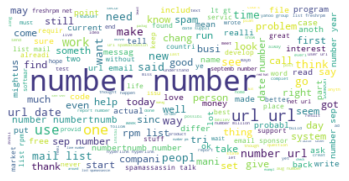

In [52]:
wordcloud = WordCloud( background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
messages.columns

Index(['label', 'message', 'leng', 'lowered', 'After_Con', 'acc', 'filter',
       'punc', 'stopword', 'token', 'lem', 'stem'],
      dtype='object')

In [54]:
low_count=X_vct_low.shape[1]
acc_count=X_vct_acc.shape[1]
pun_count=X_vct_pun.shape[1]
stopw_count=X_vct_stop.shape[1]
lem_count=X_vct_lem.shape[1]
stem_count=X_vct_stem.shape[1]

In [55]:
data = [['original count', low_count],
        ['accented char', acc_count],
        ['punctuation', pun_count],
       ['stopword',stopw_count],
       ['lemmatization',lem_count],
       ['stemming',stem_count]]

In [56]:
#Total count after each and everything

count_df = pd.DataFrame(data,columns=['name','count'])
count_df

,name,count
0,original count,32570
1,accented char,32117
2,punctuation,30542
3,stopword,30399
4,lemmatization,27494
5,stemming,22088


##### Displaying this dataframe using visualization

(15000, 35000)

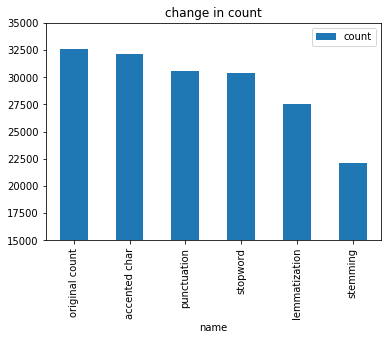

In [57]:
count_df.plot(x ='name', y='count', kind = 'bar')
plt.title('change in count')
axes = plt.gca()
ymin=15000
ymax=35000
axes.set_ylim([ymin,ymax])

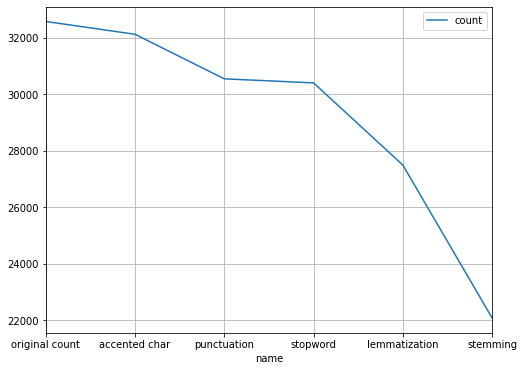

In [58]:
plt.rcParams['figure.figsize'] = (8,6)
count_df.plot.line(x='name', y='count', figsize=(8,6),grid=True)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3500,analyzer='word', lowercase=False)
messages['stem']=messages['stem'].apply(str)
X_vct = cv.fit_transform(messages['stem'])
print(X_vct.shape)

(8538, 3500)


In [60]:
X=X_vct

##### Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [62]:
messages['label']=lb.fit_transform(messages['label'])

In [63]:
y = messages['label']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int32

##### Train -Test split

In [64]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Lets apply the algorithms now!

## Naive Bayes

In [65]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
modelNb=nb.fit(X_train,y_train)

In [66]:
modelNb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
y_pred=modelNb.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

### Accuracy Score

In [69]:
from sklearn.metrics import accuracy_score
N_acc=accuracy_score(y_test,y_pred)

In [70]:
N_acc

0.9642857142857143

### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
N_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 33.0, 'Predicted label')

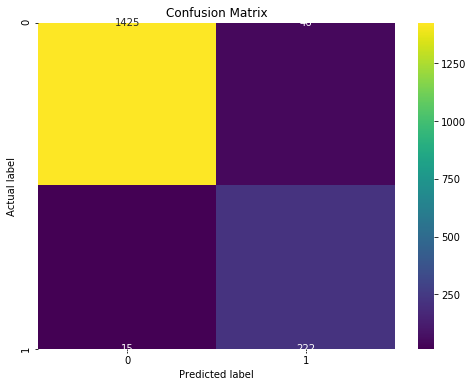

In [72]:
sns.heatmap(N_matrix, annot=True, fmt='g',cmap="viridis")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt=DecisionTreeClassifier()
modelDt=dt.fit(X_train,y_train)
modelDt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
y_pred=modelDt.predict(X_test)

### Accuracy Score

In [76]:
from sklearn.metrics import accuracy_score
D_acc=accuracy_score(y_test,y_pred)

In [77]:
D_acc

0.9613583138173302

### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
D_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 33.0, 'Predicted label')

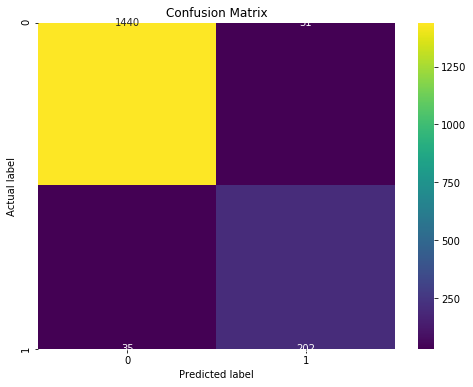

In [79]:
sns.heatmap(D_matrix, annot=True, fmt='g',cmap="viridis")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
model1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred=model1.predict(X_test)

### Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score
L_acc=accuracy_score(y_test,y_pred)

In [83]:
L_acc

0.9830210772833724

### Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix
L_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 33.0, 'Predicted label')

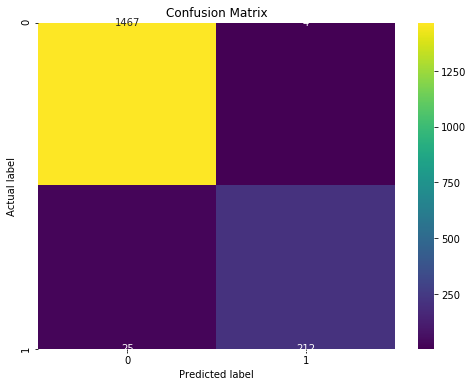

In [85]:
sns.heatmap(L_matrix, annot=True, fmt='g',cmap="viridis")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## K nearest neighbors Machine Learning

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
modelK=knn.fit(X_train,y_train)
modelK

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
y_pred=modelK.predict(X_test)

### Accuracy Score

In [88]:
from sklearn.metrics import accuracy_score
K_acc=accuracy_score(y_test,y_pred)

In [89]:
K_acc

0.9344262295081968

### Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix
K_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 33.0, 'Predicted label')

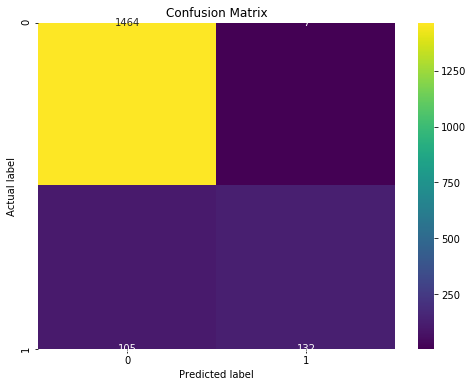

In [91]:
sns.heatmap(K_matrix, annot=True, fmt='g',cmap="viridis")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Comparing Accuracies of different algorithms

In [92]:
import pandas as pd 
  
# intialise data of lists. 
data = {'Name':['Naive Baiyes', 'Decision Tree', 'Logistic', 'KNN'], 'Acc':[N_acc*100, D_acc*100, L_acc*100 , K_acc*100]} 
  
# Create DataFrame 
df_acc = pd.DataFrame(data) 
  
# Print the output. 
df_acc 

,Name,Acc
0,Naive Baiyes,96.428571
1,Decision Tree,96.135831
2,Logistic,98.302108
3,KNN,93.442623


## Bar chart

(90, 100)

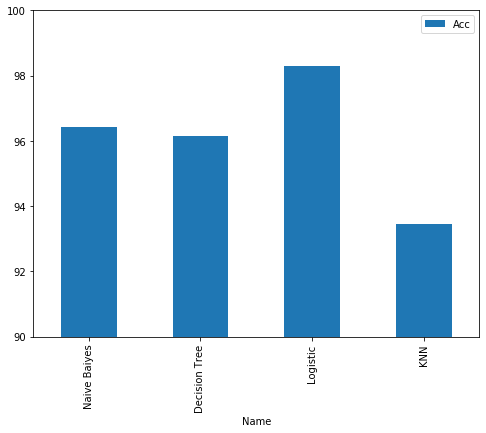

In [93]:
df_acc.plot(x ='Name', y='Acc', kind = 'bar')
axes = plt.gca()
ymin=90
ymax=100
axes.set_ylim([ymin,ymax])

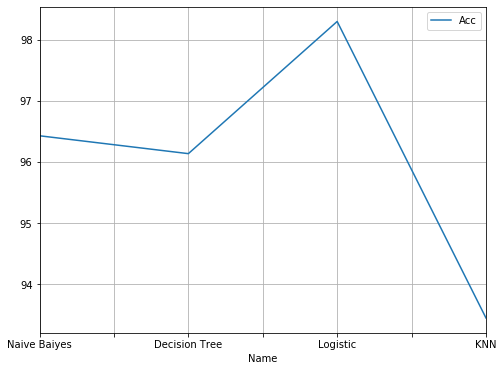

In [94]:
#plt.rcParams['figure.figsize'] = (8,6)
df_acc.plot.line(x='Name', y='Acc', figsize=(8,6),grid=True)


# Predicting on Test Data

In [97]:
df=pd.read_csv('to_test.csv')

In [98]:
df.head(10)

,index,body_text
0,3497,Dorothy@kiefer.com (Bank of Granite issues Str...
1,3498,says the &lt;#&gt; year old with a man and m...
2,3499,I will come to ur home now
3,3500,Free any day but i finish at 6 on mon n thurs...
4,3501,Will you be here for food
5,3502,"life alle mone,eppolum oru pole allalo"
6,3503,Nite...
7,3504,"Two fundamentals of cool life: ""Walk, like you..."
8,3505,"Camera quite good, 10.1mega pixels, 3optical a..."
9,3506,Hi Petey!noiÂ’m ok just wanted 2 chat coz aven...


In [99]:
df.shape

(2071, 2)

In [100]:
df['lowered']=df['body_text'].str.lower()
df['After_Con']=df['lowered'].apply(lambda x:decontracted(x))
df['acc']=df['After_Con'].apply(lambda x:strip_accents(x))
df['filter']=df['acc'].apply(lambda x:filter_string(x))
df['punc']=df['filter'].apply(lambda x:remove_punctuation(x))
df['stopword']=df['punc'].apply(lambda x:stopwords(x))
df['token']=df['stopword'].apply(lambda x : tokenizer.tokenize(x.lower()))
df['lem']=df['token'].apply(lambda x:word_lemm(x))
df['stem']=df['token'].apply(lambda x:word_stemm(x))

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3500,analyzer='word', lowercase=False)
df['stem']=df['stem'].apply(str)
Xn = cv.fit_transform(df['stem'])
print(Xn.shape)

(2071, 3500)


In [102]:
Xn

<2071x3500 sparse matrix of type '<class 'numpy.int64'>'
	with 16449 stored elements in Compressed Sparse Row format>

In [103]:
y_pred_new=model1.predict(Xn)

In [104]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
d= dict(zip(list(set(y_pred)),('ham','spam'))) 
d

{0: 'ham', 1: 'spam'}

In [106]:
import collections
w = collections.Counter(y_pred)
w

Counter({0: 1569, 1: 139})

([<matplotlib.axis.XTick at 0x188ac686c88>,
 <a list of 2 Text xticklabel objects>)

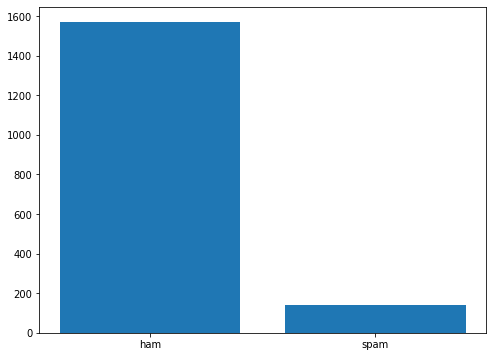

In [107]:
plt.bar(w.keys(),w.values())
plt.xticks(list(w.keys()), d.values())